## Notebook for prepping training data from IBIS cubes!

In [1]:
import numpy as np
import sparsetools as sp
import imtools as im #in the STiC example folder
import matplotlib.pyplot as plt 

In [2]:
imodel1 = sp.model("/home/milic/data/sst_sunspot/atmosout_final_mosaic_NaICaII_newcalib_092244_NNtraining.nc")

model::read: atmos type -> depth-stratified
model::read: nx=464, ny=280, ndep=14, nt=1
model::setSize: nx = 464, ny = 280, ndep = 14, nt = 1


In [3]:
# Nodes positions: 

# I actually do not care

# nodes_temp = -4.0, -3.5, -3.0, -2.5, -1.8, -1.0, 0.0, 0.8
# nodes_vlos = -4.0, -3.0, -2.0, -1.0, 0
# nodes_vturb = -4.0, -3.0, -2.0, -1.0, 0

In [7]:
temperature = imodel1.temp[0,]
vlos = imodel1.vlos[0,]
vturb = imodel1.vturb[0,]
ltau = imodel1.ltau[0,0,0] # the cmass array is the same for every pixel

In [9]:
print(ltau)

[-7.         -6.39622641 -5.79245281 -5.18867922 -4.58490562 -3.98113203
 -3.37735844 -2.77358484 -2.16981125 -1.56603777 -0.96226418 -0.35849056
  0.24528302  0.8490566 ]


In [24]:
inodes_temp = np.array([16,21,26,31,38,46,56,64])
inodes_vlos = np.array([16,26,36,46,56])
inodes_vturb = np.array([16,26,36,46,56])

print (cmass[inodes_temp])

[-3.98038149 -3.48038149 -2.98038149 -2.48038149 -1.78038144 -0.98038143
  0.01961857  0.81961858]


In [10]:
tempnodes = temperature#[:,:,inodes_temp]
vlosnodes = vlos#[:,:,inodes_vlos]
vturbnodes = vturb#[:,:,inodes_vturb]

In [12]:
#imodel1 = sp.model("c:/Data/QS_inversions/atmosout_IBIS_data_inversion_patch_122_c2.nc")
#imodel1 = sp.model("c:/Data/QS_inversions/atmosout_IBIS_data_inversion_patch_122_c2.nc")

In [13]:
from astropy.io import fits

In [14]:
temphdu = fits.PrimaryHDU(tempnodes)
vloshdu = fits.ImageHDU(vlosnodes)
vturbhdu = fits.ImageHDU(vturbnodes)
mylist = fits.HDUList([temphdu, vloshdu, vturbhdu])
mylist.writeto("test_nodes_newcalib_092244.fits", overwrite=True)


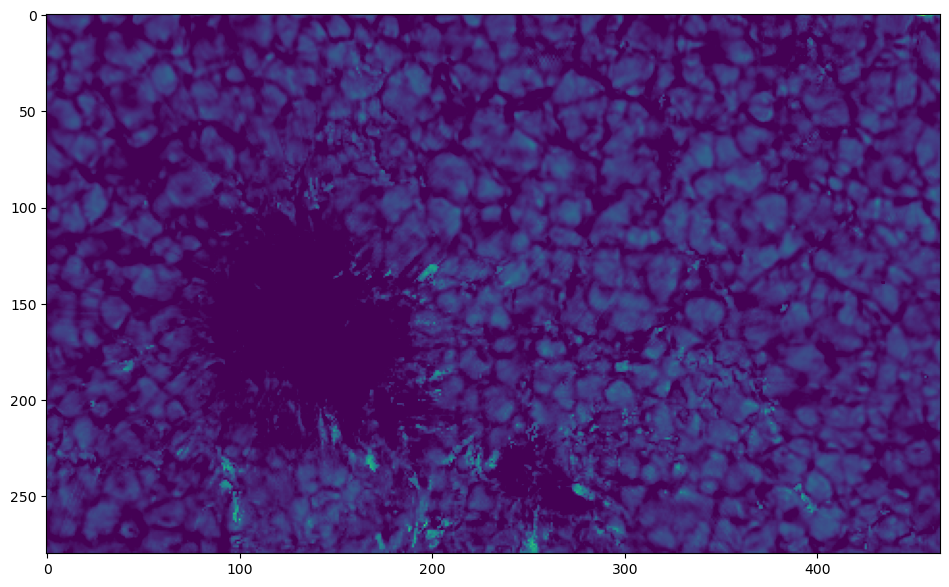

In [18]:
plt.figure(figsize=[12,7])
plt.imshow(temperature[:,:,-3], vmin=5800, vmax=7200)